In [7]:
# Bloco 1: Instalação e Importação de Bibliotecas
!pip install numpy matplotlib scikit-learn --quiet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn import tree  # Esta é a importação que estava faltando

print("Bibliotecas instaladas e importadas com sucesso!")

Bibliotecas instaladas e importadas com sucesso!


In [8]:
# Bloco 2: Preparação dos Dados
dados_emprestimo = [
    ['médio', 'sênior', 'baixo', 'sim', 'não'],
    ['médio', 'sênior', 'baixo', 'não', 'não'],
    ['baixo', 'sênior', 'baixo', 'sim', 'sim'],
    ['alto', 'média', 'baixo', 'sim', 'sim'],
    ['alto', 'jovem', 'alto', 'sim', 'sim'],
    ['alto', 'jovem', 'alto', 'não', 'não'],
    ['baixo', 'jovem', 'alto', 'não', 'sim'],
    ['médio', 'média', 'baixo', 'sim', 'não'],
    ['médio', 'jovem', 'alto', 'sim', 'sim'],
    ['alto', 'média', 'alto', 'sim', 'sim'],
    ['médio', 'média', 'alto', 'não', 'sim'],
    ['baixo', 'jovem', 'baixo', 'não', 'sim'],
    ['baixo', 'sênior', 'alto', 'sim', 'sim'],
    ['alto', 'média', 'baixo', 'não', 'não']
]

# Separando features (X) e target (Y)
X1 = np.array([linha[:4] for linha in dados_emprestimo])
Y = np.array([linha[4] for linha in dados_emprestimo])

print("Dados originais extraídos com sucesso!")

Dados originais extraídos com sucesso!


In [9]:
# Bloco 3: Pré-processamento dos Dados
X = X1.copy()

# Mapeamento dos valores categóricos para numéricos
for i in range(len(X1)):
    # Montante
    if X1[i][0] == "baixo":
        X[i][0] = 0
    elif X1[i][0] == "médio":
        X[i][0] = 1
    else:  # alto
        X[i][0] = 2

    # Idade
    if X1[i][1] == "jovem":
        X[i][1] = 0
    elif X1[i][1] == "média":
        X[i][1] = 1
    else:  # sênior
        X[i][1] = 2

    # Salário
    if X1[i][2] == "baixo":
        X[i][2] = 0
    else:  # alto
        X[i][2] = 1

    # Conta
    if X1[i][3] == "não":
        X[i][3] = 0
    else:  # sim
        X[i][3] = 1

# Criando DataFrames
XX = pd.DataFrame(X, dtype=str, columns=['Montante', 'Idade', 'Salário', 'Conta'])
YY = pd.DataFrame(Y, dtype=str, columns=['Empréstimo'])

print("\nDados convertidos para valores numéricos:")
print(XX.head())


Dados convertidos para valores numéricos:
  Montante Idade Salário Conta
0        1     2       0     1
1        1     2       0     0
2        0     2       0     1
3        2     1       0     1
4        2     0       1     1


In [10]:
# Bloco 4: Criação e Treinamento da Árvore de Decisão
arvore_emprestimo = DecisionTreeClassifier(criterion='entropy', random_state=42)
arvore_emprestimo = arvore_emprestimo.fit(XX, YY)

print("\nÁrvore de decisão para empréstimo treinada com sucesso!")
print("Acurácia no treino:", arvore_emprestimo.score(XX, YY))


Árvore de decisão para empréstimo treinada com sucesso!
Acurácia no treino: 1.0


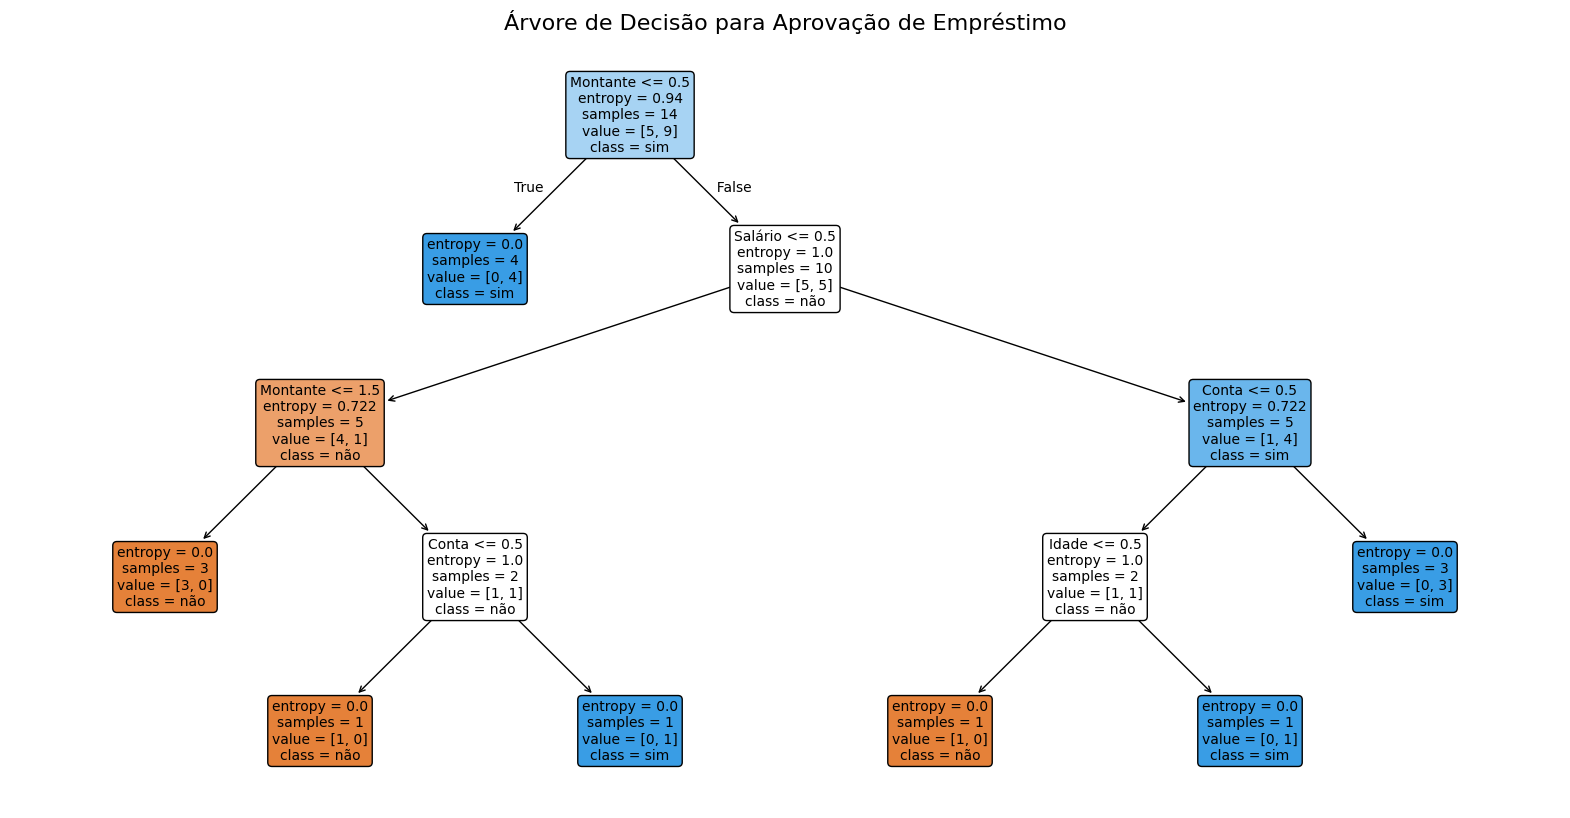

In [11]:
# Bloco 5: Visualização da Árvore de Decisão (CORRIGIDO)
plt.figure(figsize=(20,10))
previsores = ['Montante', 'Idade', 'Salário', 'Conta']
plot_tree(arvore_emprestimo,  # Usando plot_tree diretamente
          feature_names=previsores,
          class_names=arvore_emprestimo.classes_,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Árvore de Decisão para Aprovação de Empréstimo", fontsize=16)
plt.show()

In [12]:
# Bloco 6: Extração das Regras de Decisão
r = export_text(arvore_emprestimo, feature_names=previsores)
print("\nRegras da Árvore de Decisão para Empréstimo:\n")
print(r)


Regras da Árvore de Decisão para Empréstimo:

|--- Montante <= 0.50
|   |--- class: sim
|--- Montante >  0.50
|   |--- Salário <= 0.50
|   |   |--- Montante <= 1.50
|   |   |   |--- class: não
|   |   |--- Montante >  1.50
|   |   |   |--- Conta <= 0.50
|   |   |   |   |--- class: não
|   |   |   |--- Conta >  0.50
|   |   |   |   |--- class: sim
|   |--- Salário >  0.50
|   |   |--- Conta <= 0.50
|   |   |   |--- Idade <= 0.50
|   |   |   |   |--- class: não
|   |   |   |--- Idade >  0.50
|   |   |   |   |--- class: sim
|   |   |--- Conta >  0.50
|   |   |   |--- class: sim



In [13]:
# Bloco 7: Fazendo Previsões
print("\nExemplos de previsão para empréstimo:")

# Exemplo 1: Montante=médio, Idade=sênior, Salário=baixo, Conta=sim
X2 = pd.DataFrame([['1','2','0','1']], columns=previsores)
print("\nCondições 1:\n", X2)
print("Previsão:", arvore_emprestimo.predict(X2)[0])

# Exemplo 2: Montante=alto, Idade=média, Salário=alto, Conta=sim
X3 = pd.DataFrame([['2','1','1','1']], columns=previsores)
print("\nCondições 2:\n", X3)
print("Previsão:", arvore_emprestimo.predict(X3)[0])


Exemplos de previsão para empréstimo:

Condições 1:
   Montante Idade Salário Conta
0        1     2       0     1
Previsão: não

Condições 2:
   Montante Idade Salário Conta
0        2     1       1     1
Previsão: sim


In [14]:
# Bloco 8: Interpretação dos Valores Numéricos
print("\nLegenda para interpretação dos valores:")
print("\nMontante: 0 = baixo, 1 = médio, 2 = alto")
print("Idade: 0 = jovem, 1 = média, 2 = sênior")
print("Salário: 0 = baixo, 1 = alto")
print("Conta: 0 = não, 1 = sim")
print("Empréstimo: não = negado, sim = aprovado")


Legenda para interpretação dos valores:

Montante: 0 = baixo, 1 = médio, 2 = alto
Idade: 0 = jovem, 1 = média, 2 = sênior
Salário: 0 = baixo, 1 = alto
Conta: 0 = não, 1 = sim
Empréstimo: não = negado, sim = aprovado
